**What is Transfer learning**

Transfer learning generally refers to a process where a model trained on one problem is used in some way on a second related problem. For example, the knowledge gained while learning to recognize oranges could apply when trying to recognize mangos. In deep learning, transfer learning is a technique whereby a neural network model is first trained on a problem similar to the problem that is being solved. Transfer learning has the advantage of decreasing the training time for a learning model and can result in lower generalization error.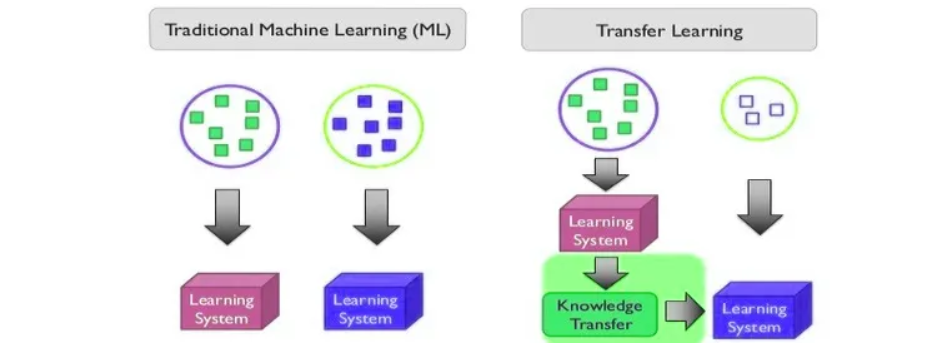

**VGG16**

VGG-16 is a convolutional neural network that is 16 layers deep. You can load a pre-trained version of the network trained on more than a million images from the ImageNet database. The pre-trained network can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals. As a result, the network has learned rich feature representations for a wide range of images. The network has an image input size of 224-by-224.

In [ ]:
!nvidia-smi

Mon Apr  1 10:32:06 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install tensorflow-gpu

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [ ]:
#import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob



In VGG16, we cutdown the last layers because currently the last layer has 1000 different outputs. because in the Imagenet competition
this VGG16 is used to categorize 1000 different images. and in our problem statement, we have 10 different outputs and we use only 10 neurons in the output.

So this is transfer learning, we are using the power of VGG16 and solving our problem statement.

In [ ]:
#resize all the images to this
IMAGE_SIZE = [224,224]

In [ ]:
train_path= '/content/drive/MyDrive/Colab Notebooks/Madhu datasets/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
valid_path= '/content/drive/MyDrive/Colab Notebooks/Madhu datasets/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/test'

In [ ]:
# Import the 'Inception v3'  library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
# [3] is for RGB channel as our images are in  color. if our images in black and white, we give [1]

87910968/87910968 [==============================] - 5s 0us/step


**NOTE: [3] is for RGB channel as our images are in  color. if our images in black and white, we give [1] .**

Include_top = False means we are telling whether the last layer of VGG16 to be added or not. here false means last layer is getting removed. Because we dont have 1000 categories in our pb and we dont need it.

In [ ]:
# dont train existing layers
for layer in inception.layers:
  layer.trainable = False

we dont have to train the existing layers of VGG16.Because it is already trained and the weights are fixed.It is a state of art architecture. so make sure we should not train the layers. If we dont keep layer.trainable = False, then our whole model will start training itself again and again and due to that it wont give us expected accuracy.

Because VGG16 has been trained with many many images and lot of GPU power is used on it.

In [ ]:
#useful for getting the number of output classes
folders = glob('/content/drive/MyDrive/Colab Notebooks/Madhu datasets/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/*')

Above code says that , inorder to add last layer of VGG16, how many categories are there. How can we see that? this is by glob function.

In [ ]:
folders

['/content/drive/MyDrive/Colab Notebooks/Madhu datasets/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_mosaic_virus',
 '/content/drive/MyDrive/Colab Notebooks/Madhu datasets/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Early_blight',
 '/content/drive/MyDrive/Colab Notebooks/Madhu datasets/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot',
 '/content/drive/MyDrive/Colab Notebooks/Madhu datasets/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/content/drive/MyDrive/Colab Notebooks/Madhu datasets/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Septoria_leaf_spot',
 '/content/drive/MyDrive/Colab Notebooks/Madhu datasets/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Spider_mite

In [ ]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders),activation = 'softmax')(x) # here we are appending our folders as a dense  layer with an activation func softmax with 'x'value.
#it basically says to add no.of categories at the last layer
# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
#view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

the last line dense says that we have 10 output neurons.This is the no.of categories that we have in our pb.

In [ ]:
# tell the model , what cost and optimization method to use
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
#use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Data Augmentation

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)
# NOTE : Dont apply data augmentation techniques in test dataset. Apply only the scaling one

In [ ]:
#Make sure you provide the same target size as initialised for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Madhu datasets/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
                                                 target_size = (224,224),
                                                 batch_size=16,
                                                 class_mode = 'categorical')

Found 3724 images belonging to 10 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Madhu datasets/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/test',
                                             target_size = (224,224),
                                             batch_size=16,
                                             class_mode = 'categorical')

Found 1966 images belonging to 10 classes.


In [ ]:
#fit the model
#run the cell. It will take some time to execute
r = model.fit_generator(
    training_set,
    validation_data = test_set,
    epochs=10,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set)
)

<ipython-input-16-57dafd7ee8d2>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10
233/233 [==============================] - 3950s 17s/step - loss: 4.1277 - accuracy: 0.6372 - val_loss: 32.9191 - val_accuracy: 0.3113
Epoch 2/10
233/233 [==============================] - 73s 315ms/step - loss: 2.1259 - accuracy: 0.7956 - val_loss: 30.9362 - val_accuracy: 0.5168
Epoch 3/10
233/233 [==============================] - 73s 311ms/step - loss: 2.3751 - accuracy: 0.8037 - val_loss: 30.2106 - val_accuracy: 0.4573
Epoch 4/10
233/233 [==============================] - 74s 317ms/step - loss: 1.9051 - accuracy: 0.8394 - val_loss: 31.2915 - val_accuracy: 0.4985
Epoch 5/10
233/233 [==============================] - 73s 313ms/step - loss: 1.6311 - accuracy: 0.8628 - val_loss: 30.7076 - val_accuracy: 0.5371
Epoch 6/10
233/233 [==============================] - 72s 307ms/step - loss: 1.9118 - accuracy: 0.8612 - val_loss: 31.8783 - val_accuracy: 0.5575
Epoch 7/10
233/233 [==============================] - 72s 308ms/step - loss: 1.7561 - accuracy: 0.8727 - val_loss: 37.2512 -

**NOTE: if you want to use other models like MObileNet, ResNet, VGG16etc...just replace inception in the code.**